# Predicting PGA Tour Performance: An Analysis of Key Metrics from 2010-2017

## Project Description
In this project, conducted as part of the Sports Analytics course (TDDE64) at Linköping University, a dataset containing PGA Tour player data from 2010 to 2017 is explored. The goal is to analyze various performance metrics to identify the most influential factors on a golfer's average score and predict outcomes using machine learning techniques and regression analysis.

## Objectives
- **Feature Importance**: Identify the top metrics that most significantly impact scoring average.
- **Predictive Modeling**: Compare the effectiveness of different predictive models (Random Forest vs. SVM) in predicting top performers.

## Table of Contents
1. [Understanding the Problem and the Data](#section_1)
2. [Data Cleaning and Formatting](#section_2)
3. [Exploratory Data Analysis](#section_3)
4. [Baseline Model](#section_4)
5. [Improved Model](#section_5)
6. [Conclusion](#section_6)

### 1. <a id='section_1'>Understanding the Problem and the Data</a>
pgatour_cleaned.csv contains 11 columns. Each row indicates a golfer's performance for that year.

- **Name**: Name of the golfer
- **Rounds**: Number of PGA tour rounds played in that year by that particular player.
- **Scoring**: Average score per round played for that year.
- **Driving Distance**: Average drive distance is calculated from two holes per round, chosen to negate wind effects. The measurement ends where the drive stops, regardless of fairway placement.
- **FWY_%**: The percentage of time a tee shot comes to rest in the fairway (regardless of club)
- **GIR_%**: Green in Regulation (GIR) percentage is the frequency a player's ball touches the green after the GIR stroke, which is par minus two (1st stroke on par 3, 2nd on par 4, 3rd on par 5).
- **SG_P (Strokes gained putting)**: Strokes gained putting is calculated by comparing a player's putts from a specific distance to a baseline, subtracting the field average, and summing this for all holes. This total is then divided by the number of rounds played.
- **SG_TTG (Strokes gained tee to green)**: Average per round of how a player's strokes compare to the field average for the same course and event, excluding strokes gained putting.
- **SG_T (Strokes Gained Total)**: The per round average of the number of strokes the player was better or worse than the field average on the same course & event.
- **Points**: FedExCup points earned.
- **TOP_10**: Yearly count of a player's top 10 finishes
- **1ST**: The number of wins the player had in that year.
- **Year**: The year the data was collected.
- **Money**: The amount of money the player earned in that year.
- **Country**: Home country for player.

### 2. <a id='section_2'>Data Cleaning and Formatting</a>

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and Preliminary Check

In [2]:
df = pd.read_csv('data/raw/pgatour_raw.csv', encoding = 'cp1252', index_col = 0)

In [3]:
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,"17,703",7.0,1.0,2007,"$3,441,119",AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,"15,630",6.0,1.0,2007,"$3,413,185",AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,"2,400",4.0,NaN,2007,"$868,303",GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,"1,989",NaN,NaN,2007,"$461,216",DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,"1,875",1.0,NaN,2007,"$513,630",AUS


In [4]:
df.shape

(2044, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            2044 non-null   object 
 1   ROUNDS          2044 non-null   int64  
 2   SCORING         2044 non-null   float64
 3   DRIVE_DISTANCE  2044 non-null   float64
 4   FWY_%           2044 non-null   float64
 5   GIR_%           2044 non-null   float64
 6   SG_P            2044 non-null   float64
 7   SG_TTG          2044 non-null   float64
 8   SG_T            2044 non-null   float64
 9   POINTS          2044 non-null   object 
 10  TOP 10          1692 non-null   float64
 11  1ST             371 non-null    float64
 12  Year            2044 non-null   int64  
 13  MONEY           2044 non-null   object 
 14  COUNTRY         2044 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 255.5+ KB


#### Cleaning Tasks

Now, let's perform several cleaning tasks to prepare the data for analysis:

- Handling Missing Values: We insert 0 for missing values in TOP 10 and 1ST as these represent counts.
- Standardizing Headers: Ensure consistency in column naming.
- Type Conversion: Correct the data types for several columns for accurate analysis.
- Currency Adjustment: Remove formatting from the MONEY column.

In [6]:
# Replace missing values with zero in specific columns where it indicates absence of counts
df.fillna({'TOP 10': 0, '1ST': 0}, inplace=True)

# Standardizing column headers
df.rename(columns={'Year': 'YEAR'}, inplace=True)

# Removing formatting and converting data types
df['POINTS'] = df['POINTS'].astype(str).str.replace(',', '').astype(int)
df['TOP 10'] = df['TOP 10'].astype(int)
df['1ST'] = df['1ST'].astype(int)
df['MONEY'] = df['MONEY'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype(float).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            2044 non-null   object 
 1   ROUNDS          2044 non-null   int64  
 2   SCORING         2044 non-null   float64
 3   DRIVE_DISTANCE  2044 non-null   float64
 4   FWY_%           2044 non-null   float64
 5   GIR_%           2044 non-null   float64
 6   SG_P            2044 non-null   float64
 7   SG_TTG          2044 non-null   float64
 8   SG_T            2044 non-null   float64
 9   POINTS          2044 non-null   int64  
 10  TOP 10          2044 non-null   int64  
 11  1ST             2044 non-null   int64  
 12  YEAR            2044 non-null   int64  
 13  MONEY           2044 non-null   int64  
 14  COUNTRY         2044 non-null   object 
dtypes: float64(7), int64(6), object(2)
memory usage: 255.5+ KB


#### Additional Data Adjustments

Here, we add derived columns and filter the data to exclude years with different scoring systems.

In [8]:
df.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,YEAR,MONEY
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06
std,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06
min,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04
25%,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05
50%,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06
75%,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06
max,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07


In [9]:
df.describe(include = ['O'])

,NAME,COUNTRY
count,2044,2044
unique,478,29
top,Aaron Baddeley,USA
freq,11,1405


In [10]:
# Adding derived columns
df['300+'] = df['DRIVE_DISTANCE'] >= 300
df['WINNER'] = df['1ST'] >= 1

# Excluding years 2007 and 2008 due to different points systems
df2 = df[df['YEAR'] >= 2009]

# Preview the cleaned subset
print(df2.head())

               NAME  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  \
389  Aaron Baddeley      66   71.153           287.8  56.48  59.57  0.604   
390      Adam Scott      53   71.720           294.9  58.77  62.82 -0.881   
391      Alex Cejka      82   70.980           281.2  69.80  66.52 -0.322   
392   Andres Romero      58   71.462           298.5  51.62  64.91 -0.044   
393     Anthony Kim      76   70.507           299.0  53.65  62.69  0.245   

     SG_TTG   SG_T  POINTS  TOP 10  1ST  YEAR    MONEY COUNTRY   300+  WINNER  
389  -0.755 -0.151     431       2    0  2009   837065     AUS  False   False  
390   0.220 -0.660     432       1    0  2009   783138     AUS  False   False  
391   0.555  0.233     416       3    0  2009   953664     GER  False   False  
392  -0.247 -0.291     329       2    0  2009   789305     ARG  False   False  
393   0.235  0.479    1420       3    0  2009  1972155     USA  False   False  


The FED EX cup points system was different in 2007 and 2008 compared to the rest of the years in this dataset. Because of this, a dataframe is created that encompasses only the years 2009-2017 so those features can be use in the machine learning model later.

In [11]:
# Only use data from 2009 onwards
df2 = df[(df['YEAR'] != 2007) & (df['YEAR'] != 2008)]

In [12]:
df2.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,YEAR,MONEY,COUNTRY,300+,WINNER
389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,False,False
390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,False,False
391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,False,False
392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,False,False
393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,False,False


#### Exporting Cleaned Data
Finally, we export the cleaned data to a new CSV file for further analysis.

In [13]:
df.to_csv('data/processed/pgatour_cleaned.csv', index = False)

### 3. <a id='section_3'>Exploratory Data Analysis</a>

#### Winner Class Distribution

[Text(0, 0.5, '% of Data'),
 Text(0.5, 1.0, '% of data broken down by winner class')]

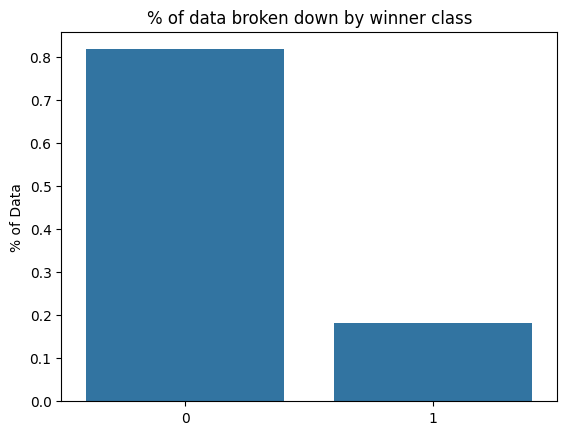

In [14]:
ci = sns.barplot(x = [0, 1], y = [(len(df2) - sum(df2['WINNER'])) / len(df2), sum(df2['WINNER']) / len(df2)])
ci.set(ylabel = "% of Data", title = "% of data broken down by winner class")

Consider the class imbalance between winners and non-winners when applying the final ML algorithm. This imbalance may affect the quality of fit metrics of traditional ML algorithms. The ROC AUC could provide a more accurate measure of model quality than a confusion matrix or overall accuracy.

#### Distrubution of all numeric features

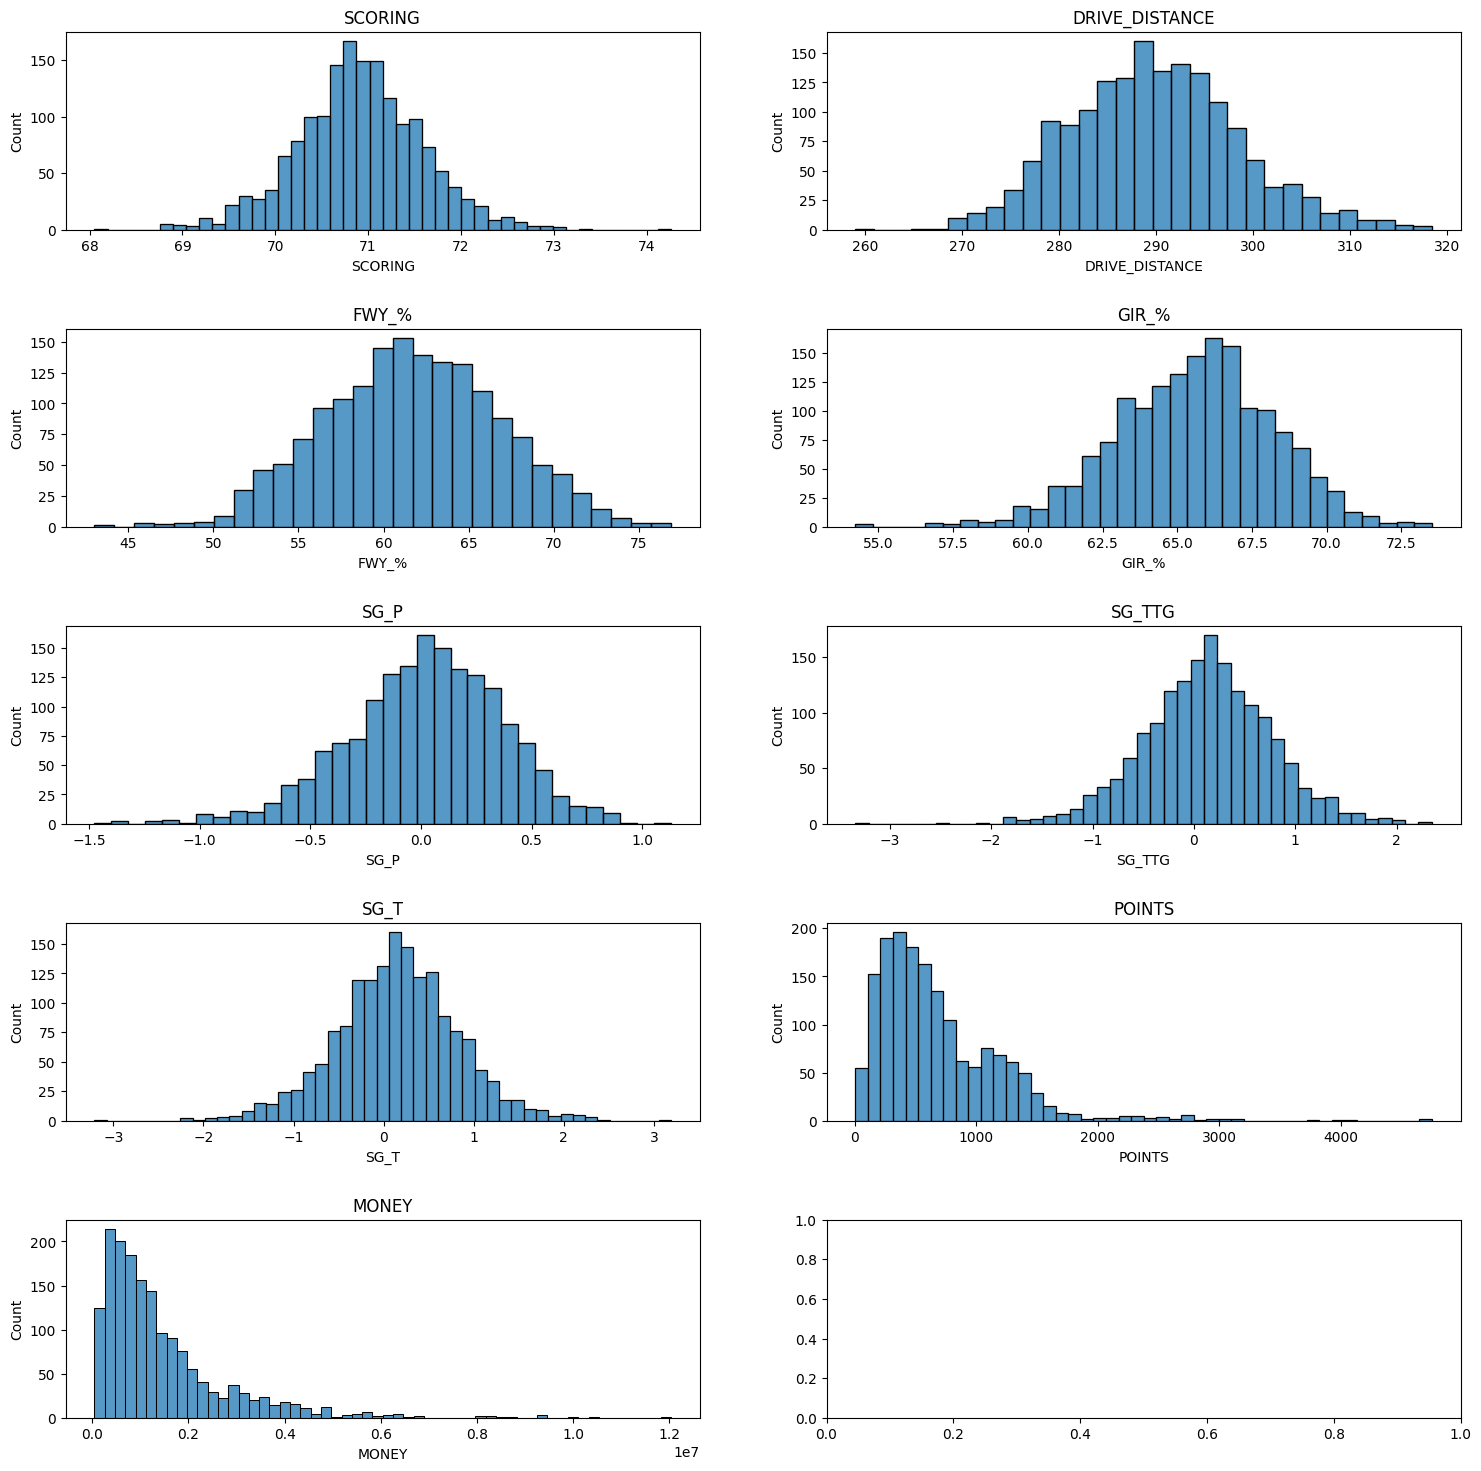

In [15]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(18,18))
columns = ['SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.histplot(df2[column], ax=ax[row][col])
    g.set(title =  column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)


The distributions show all features are nearly normally distributed, except for POINTS and MONEY, which are right-skewed. This is expected as only a few players earn a significant amount of money or points.

#### Scoring average over the years

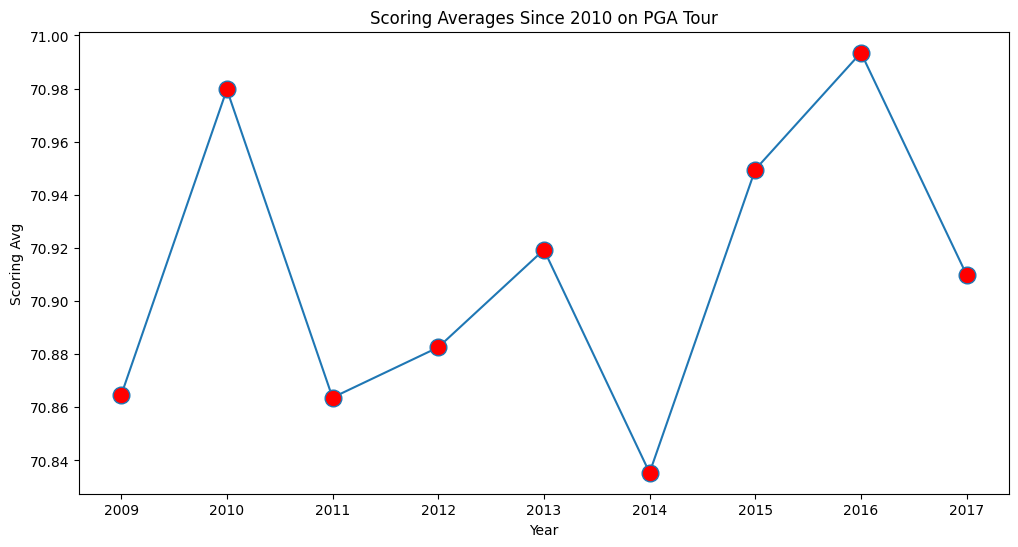

In [16]:
mean_scores = df2.groupby('YEAR')['SCORING'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_scores, marker='o', markerfacecolor='red', markersize=12)
plt.xlabel('Year')
plt.ylabel('Scoring Avg')
plt.title('Scoring Averages Since 2010 on PGA Tour')
plt.show()

The Scoring Average for players on the PGA Tour has not varied much over the 8 years in the dataset. The highest scoring averages came in 2010 and 2016 at about 71 strokes per round, and the lowest came in 2014 with roughly 70.825 strokes per round.


#### Scatterplot of AVG DRIVING DISTANCE. VS FWY %

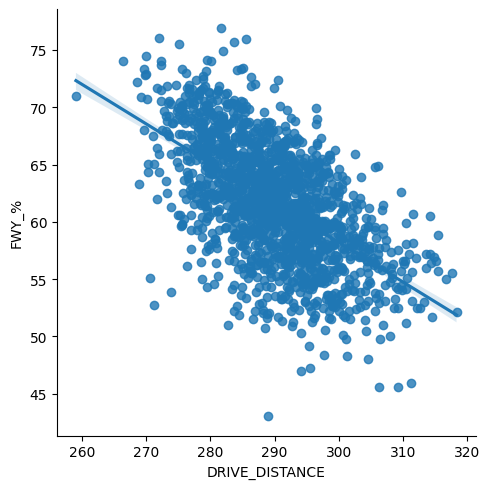

In [17]:
sns.lmplot(x = 'DRIVE_DISTANCE', y = 'FWY_%', data = df2)

In [18]:
# Fit a linear regression (degree 1 polynomial)
slope, intercept = np.polyfit(df2['DRIVE_DISTANCE'], df2['FWY_%'], 1)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.34435003655269747
Intercept: 161.5073556576925


The average distance is negatively correlated with the percentage of fairways hit. This is expected as players who hit the ball further are more likely to miss the fairway.

### Comparison of FED EX Cup Points Over Time Based on Drive Distance

<Axes: xlabel='YEAR', ylabel='POINTS'>

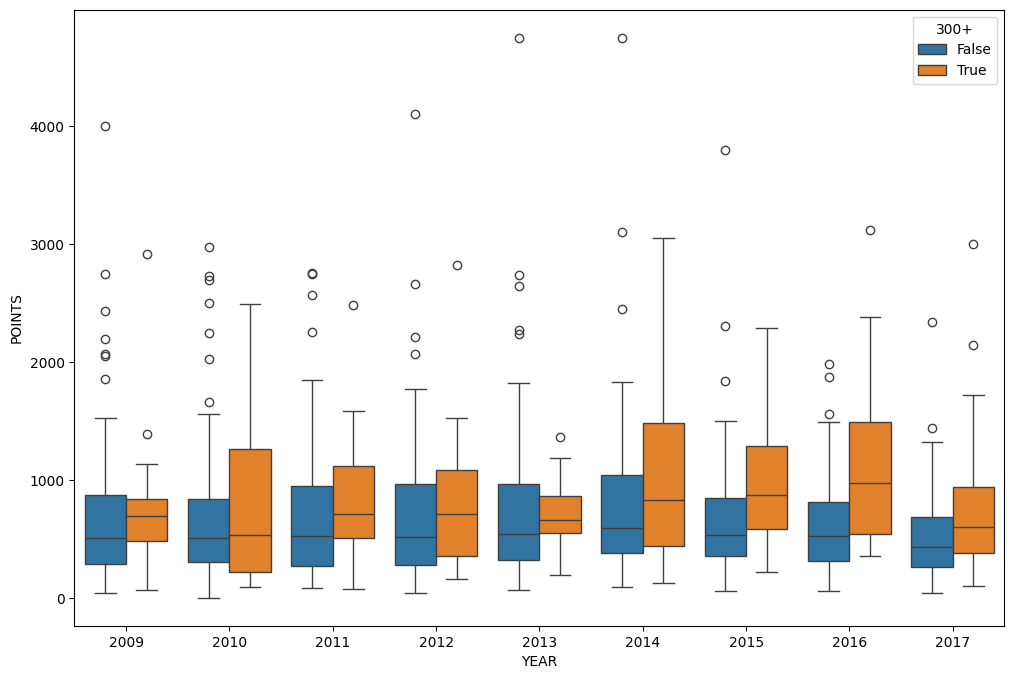

In [19]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'YEAR', y = 'POINTS', hue = '300+', data = df2)

In general, players who hit the ball further tend to earn more FedEx Cup points.

#### Average driving distance over time broken separated by winners and non winners

<Axes: xlabel='YEAR', ylabel='DRIVE_DISTANCE'>

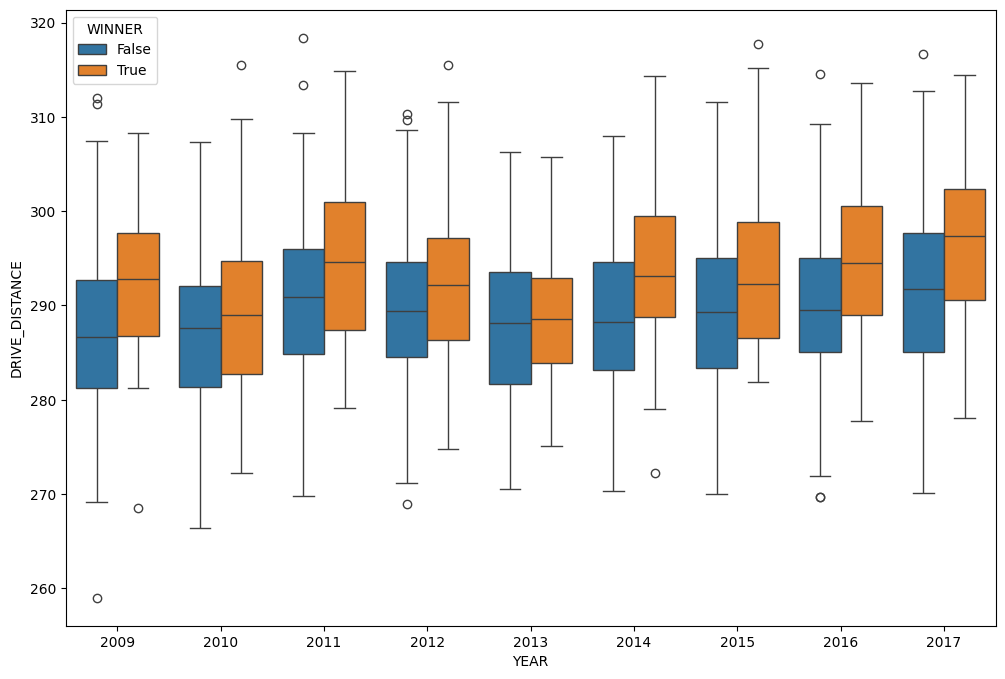

In [20]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'YEAR', y = 'DRIVE_DISTANCE', hue = 'WINNER', data = df2)

Tournament winners tend to drive the ball further than non-tournament winners.

#### Scoring Average Over time separated by 300+ drivers.

<Axes: xlabel='YEAR', ylabel='SCORING'>

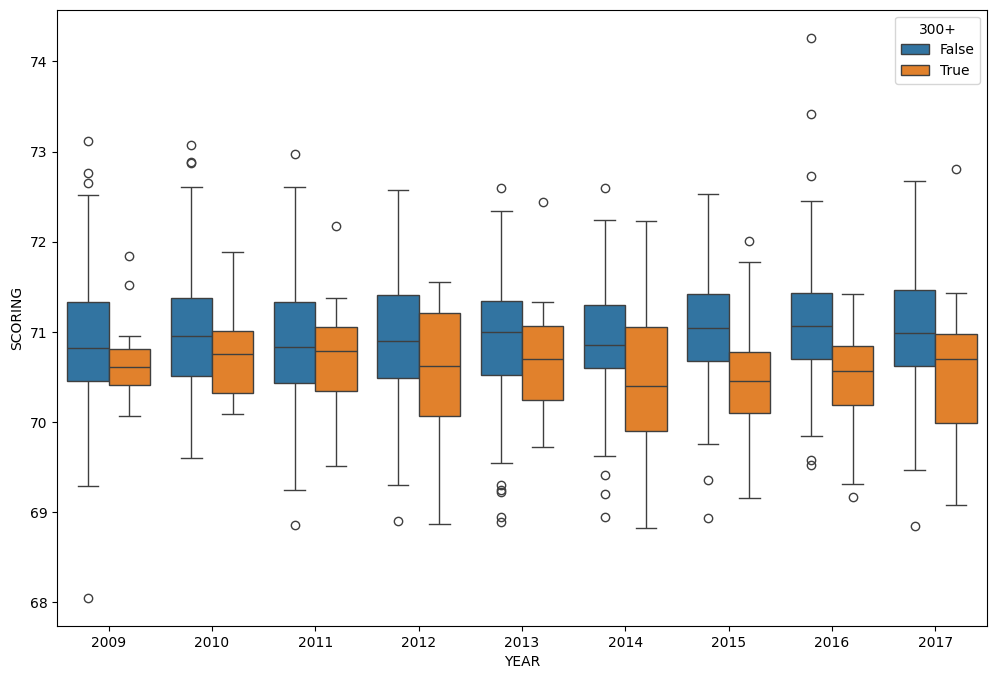

In [21]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'YEAR', y = 'SCORING', hue='300+', data = df2)

Longer drivers tend to have a lower scoring average than shorter drivers. 

#### Fairway % over time separated by tournament and non-tournament winners

<Axes: xlabel='YEAR', ylabel='FWY_%'>

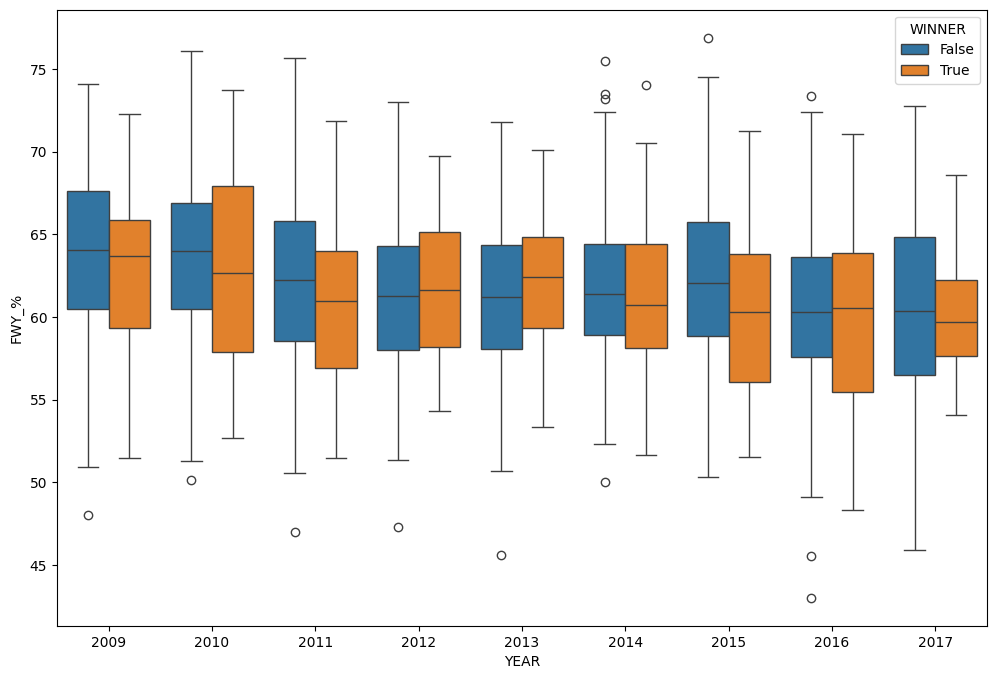

In [22]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'YEAR', y = 'FWY_%', hue = 'WINNER', data = df2)

There does not seem to be a significant difference in fairway percentage between tournament winners and non-tournament winners.

#### Number of individuals who drive the ball over 300 yards for each year in dataset

<Axes: xlabel='YEAR', ylabel='300+'>

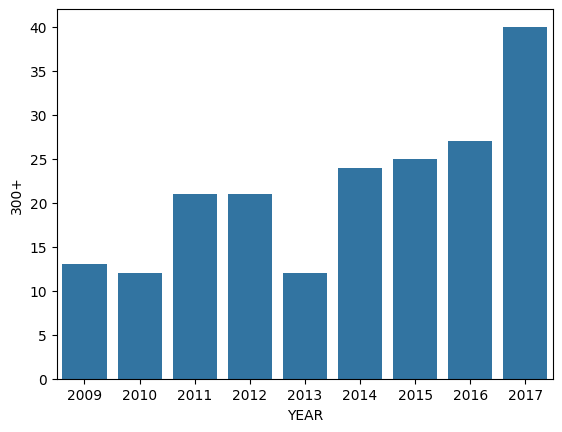

In [23]:
sns.barplot(x = 'YEAR', y = '300+', data = df2.groupby('YEAR').sum().reset_index())

Since 2010, the number of individuals who drive the ball over 300 yards on average has increased. What's amazing here is the number of guys who averaged it over 300 in 2016 compared to 2017 differs by a factor of nearly 1.5.

#### Distribution of scoring average column

<Axes: xlabel='SCORING', ylabel='Count'>

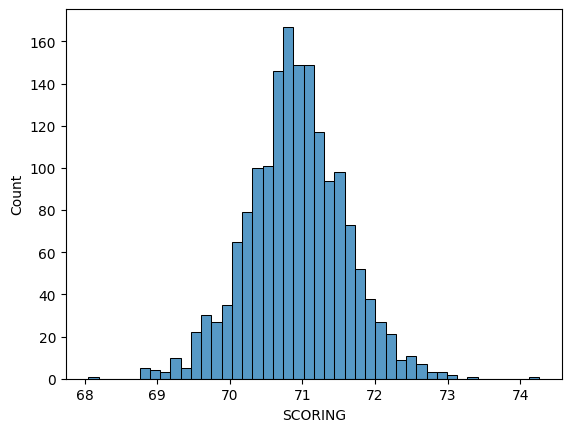

In [24]:
sns.histplot(df2['SCORING'])

Scored look approximately normally distributed, a few outliers on the higher end of the distribution. Scoring average for all golfers across all years is 70.9 with a standard deviation of 0.688.

#### Barplot of top 10's vs Scoring Average.

[(68.0, 73.0),
 Text(0.5, 1.0, "# of Top 10's vs Scoring Average"),
 Text(0, 0.5, 'Scoring Average')]

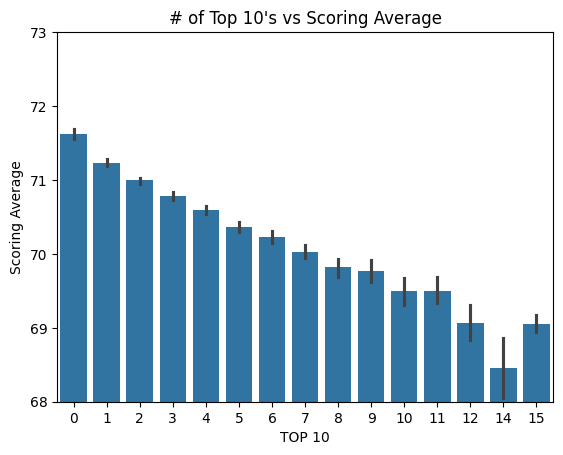

In [25]:
bp = sns.barplot(x = "TOP 10", y = 'SCORING', data = df2)
bp.set(ylim=(68, 73), title = "# of Top 10's vs Scoring Average", ylabel = "Scoring Average")

As the number of Top 10 finishes increases, the scoring average decreases. This is expected as players who finish in the top 10 are likely to have a lower scoring average.

#### Boxplots of all numeric columns based on winners and non-winners

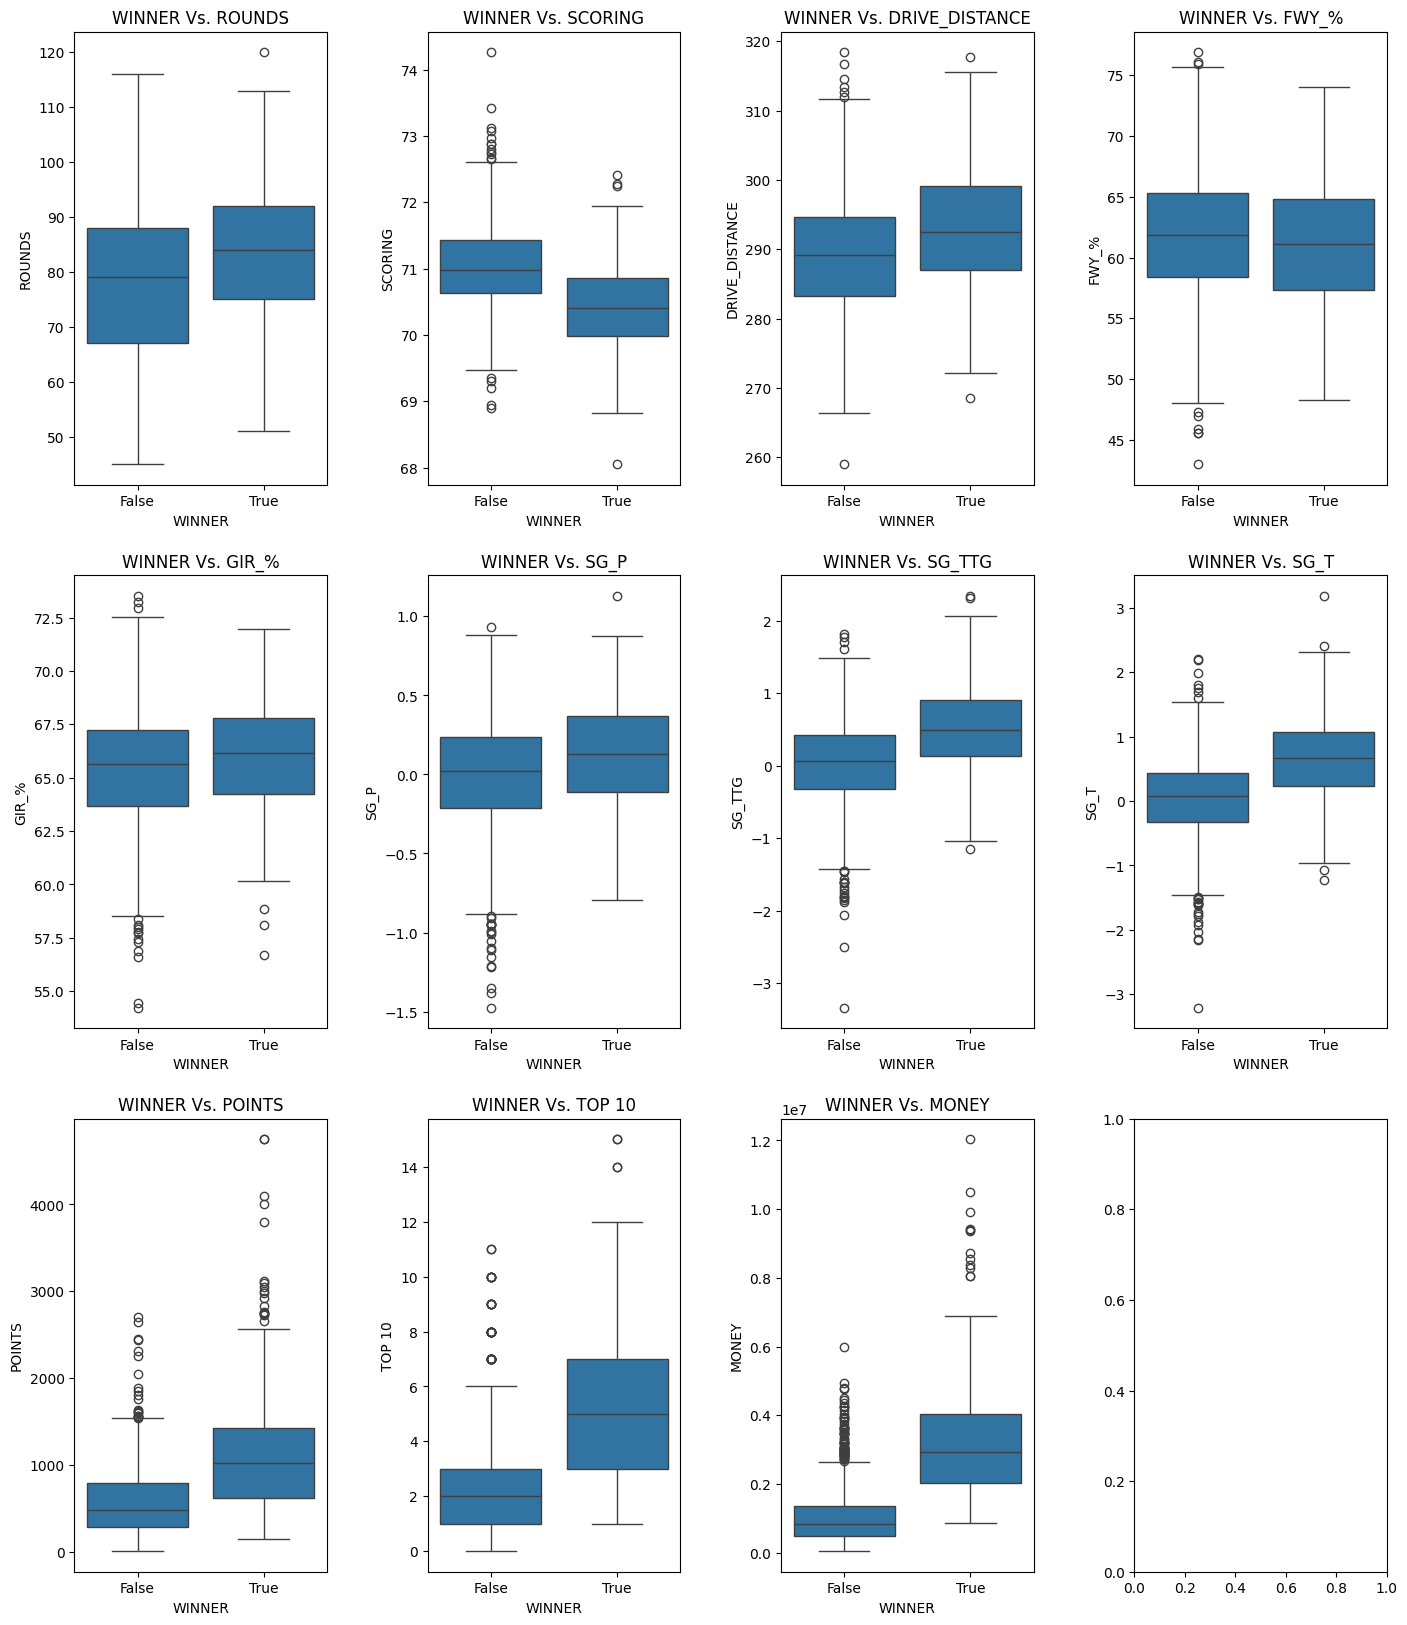

In [26]:
f, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 20))
columns = ['ROUNDS', 'SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', 'MONEY']

row, col = 0, 0
colors = {True: "green", False: "red"}

for i, column in enumerate(columns):
    g = sns.boxplot(x = 'WINNER', y = column, ax = ax[row][col], data = df2)
    g.set(title = "WINNER Vs. " + column)
    col += 1
    if col == 4:
        col = 0
        row += 1
        
plt.subplots_adjust(left = None, bottom = None, right = 1, top = None, wspace = .4, hspace = None)


#### Correlation Matrix

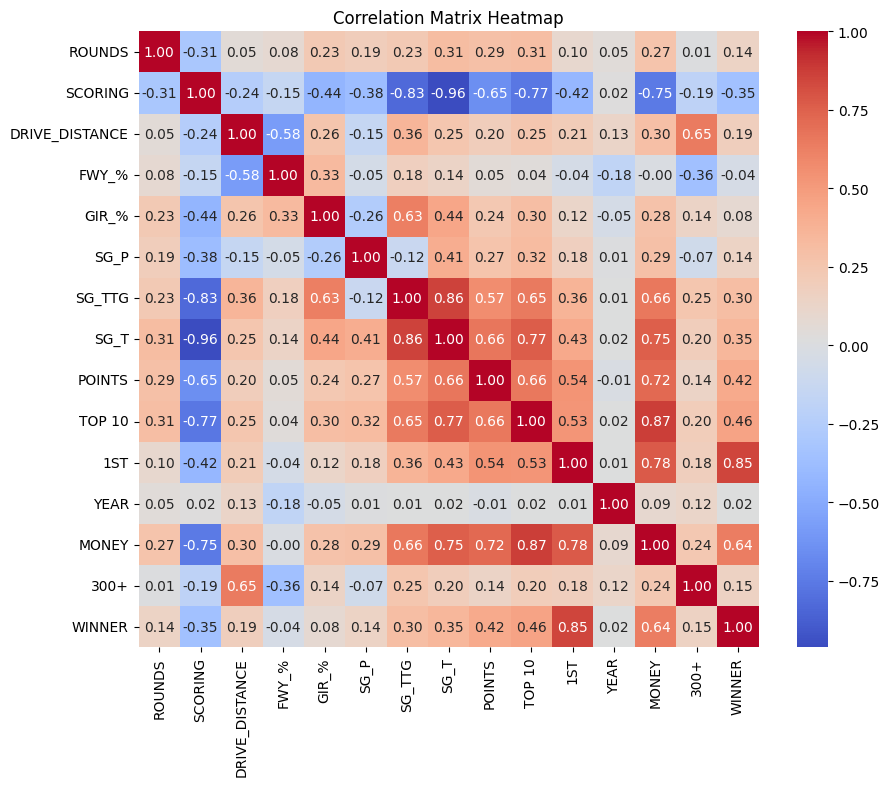

ROUNDS            0.142825
SCORING          -0.353595
DRIVE_DISTANCE    0.185856
FWY_%            -0.037512
GIR_%             0.081754
SG_P              0.144600
SG_TTG            0.303011
SG_T              0.353474
POINTS            0.419718
TOP 10            0.461936
1ST               0.846807
YEAR              0.016596
MONEY             0.639305
300+              0.153215
WINNER            1.000000
Name: WINNER, dtype: float64


In [27]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df2_copy = df2.copy()

# Convert 'WINNER' to int explicitly in the copy
df2_copy['WINNER'] = df2_copy['WINNER'].astype(int)

# Filter out only numeric columns for the correlation calculation
numeric_df = df2_copy.select_dtypes(include=['int64', 'float64', 'bool'])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize = (10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract and display the correlation values for 'WINNER'
winner_corr = corr_matrix['WINNER']
print(winner_corr)

#### Feature Engineering

Initially, the 'NAME', '1ST', and 'WINNER' columns will be removed from df2, as 'NAME' is irrelevant for the model and 'WINNER' is the target variable, derived from '1ST'. Subsequently, domain features will be established based on golf expertise. Finally, interaction terms will be generated for all non-country-related features.

In [28]:
# Assuming df2 might be a slice from another DataFrame, create a definite copy:
df2 = df2.copy()

# Assign 'WINNER' to target before modifying df2
target = df2['WINNER']

# Drop columns safely without using inplace = True
df2 = df2.drop(['1ST', 'WINNER'], axis = 1)

if 'NAME' in df2.columns:
    df2 = df2.drop(columns=['NAME'])

if 'COUNTRY' in df2.columns:
    df2 = df2.drop(columns=['COUNTRY'])

# Get dummies for the 'COUNTRY' variable and any other categorical variables automatically
df2 = pd.get_dummies(df2)

Create domain features

In [29]:
domain_features = df2.copy()

#Create money per round features
domain_features['MONEY_PER_ROUND'] = domain_features['MONEY'] / domain_features['ROUNDS']

#Create SG_P + SG_TTG metric
domain_features['SG_SUM'] = domain_features['SG_P'] + domain_features['SG_TTG']

Create Polynomial Features

In [30]:
poly_features = df2.copy()

# Import polynomial feature module
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial object with degree of 2
poly_transformer = PolynomialFeatures(degree=2)

# Train the polynomial features on the first 13 columns
poly_transformer.fit(poly_features.iloc[:, :13])

# Transform the features on the first 13 columns
poly_features = poly_transformer.transform(poly_features.iloc[:, :13])

# Create a DataFrame from the polynomial features
# Use get_feature_names_out to retrieve the feature names compatible with your version
poly_features_df = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(input_features=df2.columns[:13]))

print('Polynomial Features Shape: ', poly_features_df.shape)

# Assuming poly_features is already a DataFrame from previous steps
# Remove the first column, which is typically the intercept term consisting of all 1s
poly_features = pd.DataFrame(poly_features[:, 1:], columns=poly_transformer.get_feature_names_out(df2.columns[:13])[1:])

# Display the first few rows of the DataFrame to verify changes
poly_features.head()

Polynomial Features Shape:  (1655, 105)


,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,...,TOP 10^2,TOP 10 YEAR,TOP 10 MONEY,TOP 10 300+,YEAR^2,YEAR MONEY,YEAR 300+,MONEY^2,MONEY 300+,300+^2
0,66.0,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431.0,2.0,...,4.0,4018.0,1674130.0,0.0,4036081.0,1.681664e+09,0.0,7.006778e+11,0.0,0.0
1,53.0,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432.0,1.0,...,1.0,2009.0,783138.0,0.0,4036081.0,1.573324e+09,0.0,6.133051e+11,0.0,0.0
2,82.0,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416.0,3.0,...,9.0,6027.0,2860992.0,0.0,4036081.0,1.915911e+09,0.0,9.094750e+11,0.0,0.0
3,58.0,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329.0,2.0,...,4.0,4018.0,1578610.0,0.0,4036081.0,1.585714e+09,0.0,6.230024e+11,0.0,0.0
4,76.0,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420.0,3.0,...,9.0,6027.0,5916465.0,0.0,4036081.0,3.962059e+09,0.0,3.889395e+12,0.0,0.0


### 4. <a id='section_4'>Train, fit, and test machine learning model</a>

To predict the 2017 season's winners, a Random Forest Classification model will be utilized due to its capacity to train on diverse segments of the same dataset, thereby reducing overfitting.

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) will serve as the primary metric for model performance. This choice is motivated by the class imbalance in the data, with non-winners constituting 81% and winners 19%. A model predicting all players as non-winners would achieve 81% accuracy, but the goal is to distinguish winners from non-winners. Therefore, ROC AUC is a more suitable metric as it measures the model's ability to correctly classify tournament winners.

I'm going to follow the following framework:

- Import machine learning modules
- Build a function to run random forest model and output results.
- Run model on baseline, domain, and polynomial features
- Assess results

#### Import machine learning modules

In [31]:
from sklearn.model_selection import train_test_split #Train test splits
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import classification_report #Classification report metrics
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.metrics import roc_curve, roc_auc_score

#### Build function to run random forest model on

In [32]:
def rfc(X, y):
    
    #Split data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)
    
    #Initialize random forest classifier
    rfc = RandomForestClassifier(n_estimators = 200)
    
    #Fit model to training data
    rfc.fit(X_train, y_train)
    
    #Print chart of feature importances
    feature_importance = pd.DataFrame({"Features" : list(X.columns), "Importance": rfc.feature_importances_})
    feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
    plt.figure(figsize = (16, 8))
    sns.barplot(x = feature_importance['Features'][:10], y = feature_importance['Importance'])
    
    #Generate predictions
    rfc_pred = rfc.predict(X_test)
    
    #Create and print confusion matrix
    cf_dat = confusion_matrix(y_test, rfc_pred)
    confusion = pd.DataFrame(data = cf_dat)
    print(confusion)
    
    #Print classification report
    print(classification_report(y_test, rfc_pred))
    
    #Print ROC AUC Score
    print(roc_auc_score(y_test, rfc_pred))
    
    return roc_auc_score(y_test, rfc_pred)

#### Run model on baseline, domain, and polynomial features

Baseline Features

     0   1
0  428  22
1   28  69
              precision    recall  f1-score   support

       False       0.94      0.95      0.94       450
        True       0.76      0.71      0.73        97

    accuracy                           0.91       547
   macro avg       0.85      0.83      0.84       547
weighted avg       0.91      0.91      0.91       547

0.8312256586483391


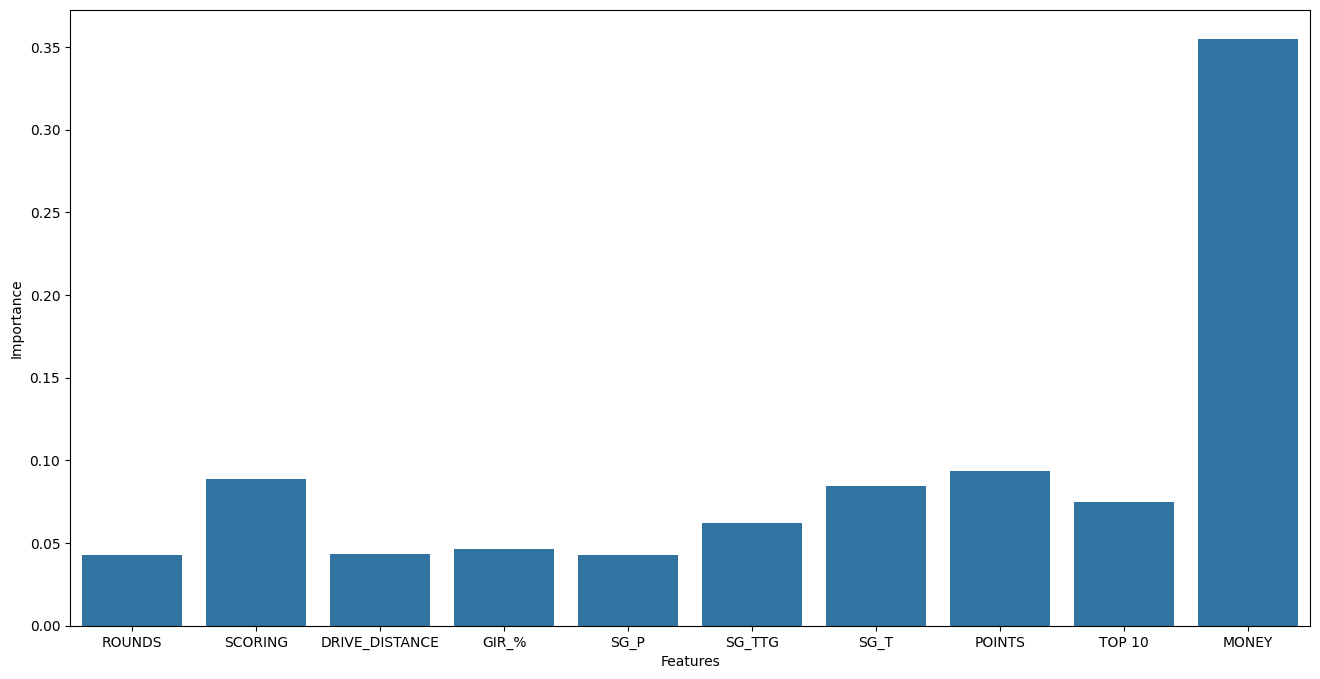

In [33]:
base_model = rfc(df2, target)

Domain Features

     0   1
0  427  23
1   29  68
              precision    recall  f1-score   support

       False       0.94      0.95      0.94       450
        True       0.75      0.70      0.72        97

    accuracy                           0.90       547
   macro avg       0.84      0.82      0.83       547
weighted avg       0.90      0.90      0.90       547

0.8249599083619702


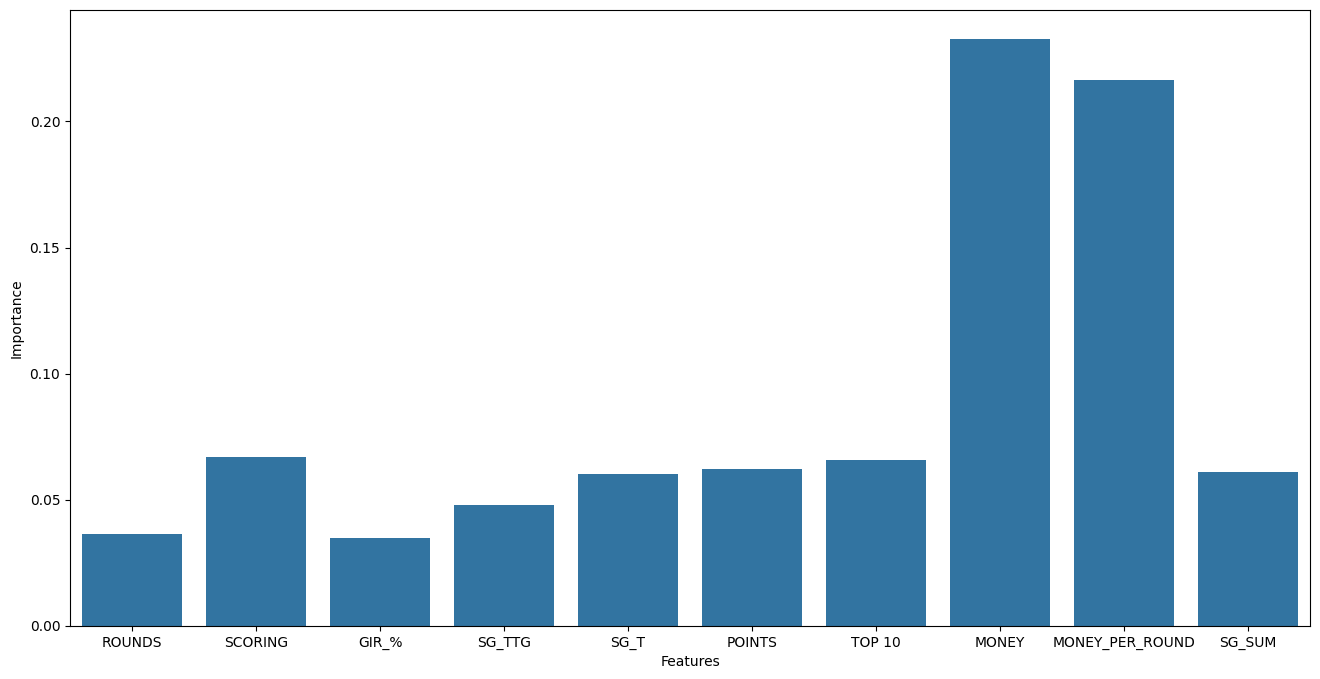

In [34]:
domain_model = rfc(domain_features, target)

Polynomial Features

     0   1
0  424  26
1   22  75
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       450
        True       0.74      0.77      0.76        97

    accuracy                           0.91       547
   macro avg       0.85      0.86      0.85       547
weighted avg       0.91      0.91      0.91       547

0.857709049255441


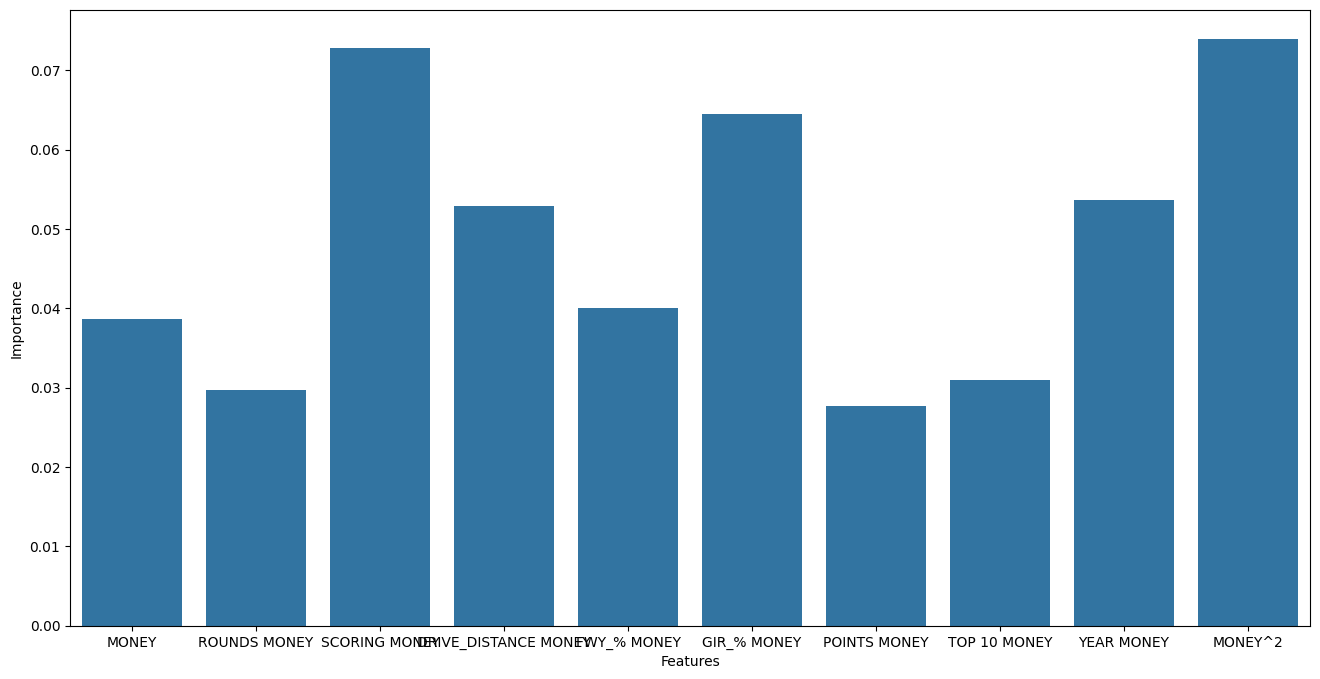

In [35]:
poly_model = rfc(poly_features, target)

#### Assess results

In [36]:
pd.DataFrame([base_model, domain_model, poly_model], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model'], columns = ['ROC AUC Score'])

,ROC AUC Score
Baseline Model,0.831226
Domain Feature Model,0.824960
Polynomial Feature Model,0.857709


We can see that the ROC AUC scorehas increaed by engineering domain and polynomial features.

#### Support Vector Machine

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Ensuring df2 has been loaded and processed according to the previous parts of your code.
# df2 should already have 'WINNER' and '1ST' columns dropped as you indicated, using it as features matrix.

# Recalling 'target' which contains the 'WINNER' column data
y = target.astype(int)  # Making sure the target is of type int

if 'NAME' in df2.columns:
    df2 = df2.drop(columns=['NAME'])  # Drop the NAME column

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)  # Using df2 which now does not include 'WINNER'

# Splitting the data into training and testing sets
# Isolating 2017 data for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Training the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel used here, adjust as necessary
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Properly filtering the 2017 data
X_2017 = df2[df2['YEAR'] == 2017]
y_2017 = target[df2['YEAR'] == 2017].astype(int)
X_2017_scaled = scaler.transform(X_2017)

y_2017_pred = svm_model.predict(X_2017_scaled)

print("2017 Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_2017, y_2017_pred))
print("\nClassification Report:")
print(classification_report(y_2017, y_2017_pred))

Confusion Matrix:
[[393  14]
 [ 24  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       407
           1       0.82      0.73      0.78        90

    accuracy                           0.92       497
   macro avg       0.88      0.85      0.87       497
weighted avg       0.92      0.92      0.92       497

2017 Results:
Confusion Matrix:
[[146   8]
 [  8  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       154
           1       0.76      0.76      0.76        34

    accuracy                           0.91       188
   macro avg       0.86      0.86      0.86       188
weighted avg       0.91      0.91      0.91       188



#### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

# Assuming 'SVC' and 'StandardScaler' have already been imported
# Re-create the SVM model to ensure it's clean
svm_model = SVC(kernel='linear')

# Standardizing the entire dataset before applying cross-validation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

# Perform 5-fold cross-validation
scores = cross_val_score(svm_model, X_scaled, y, cv=5)
print(f"Cross-validated accuracy scores: {scores}")
print(f"Average accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validated accuracy scores: [0.918429   0.92749245 0.92145015 0.90332326 0.90332326]
Average accuracy: 0.9148036253776436
Standard deviation of accuracy: 0.009817569069046477


#### Feature Importance from a Linear SVM

In [39]:
from sklearn.pipeline import make_pipeline

# Creating a pipeline that includes scaling and the SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Fit the model on the entire dataset (consider using train data only in practice)
pipeline.fit(df2, y)

# Extract the model from the pipeline
svm_model = pipeline.named_steps['svc']

# Get the coefficients
coefs = svm_model.coef_.flatten()  # Flatten is needed as the coefs can sometimes be a 2D array for binary classification

# Create a DataFrame to view feature names and their corresponding coefficients
feature_importances = pd.DataFrame(coefs, index=df2.columns, columns=['Importance'])

# Sort the features by the absolute value of their coefficient
feature_importances['Absolute Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Absolute Importance', ascending=False)

feature_importances

,Importance,Absolute Importance
MONEY,3.312462,3.312462
TOP 10,-1.235560,1.235560
SG_T,-0.384802,0.384802
SG_TTG,-0.307805,0.307805
YEAR,-0.265861,0.265861
POINTS,0.249334,0.249334
SCORING,0.197283,0.197283
SG_P,-0.143385,0.143385
ROUNDS,0.109266,0.109266
300+,0.053877,0.053877


### 5. <a id='section_5'>Conclusion</a>

This notebook shows some interesring insights into the PGA Tour data from 2010-2017. The key takeaways are:

- The top metrics that most significantly impact scoring average are Money, Top 10 finishes and Strokes Gained Total (SG_T).
- The SVM model outperformed the Random Forest model in predicting whether a player would win the tournament or not.

As you can see, it turned out that the most influential features leading to a win were not directly related to the game itself, but rather to the outcomes of the tournament, such as "Money" and "Top 10 Finishes."

A more interesting approach would be to run the algorithms without these post-tournament features. This could better reflect the true importance of each feature in relation to one another and provide trainers and players with insights into the most critical aspects of performance that can be directly improved upon. Given that "Money" and "Top 10 Finishes" had such significant importance compared to other features, excluding them would likely reduce accuracy. To compensate, a larger dataset with more players and additional features would be necessary.